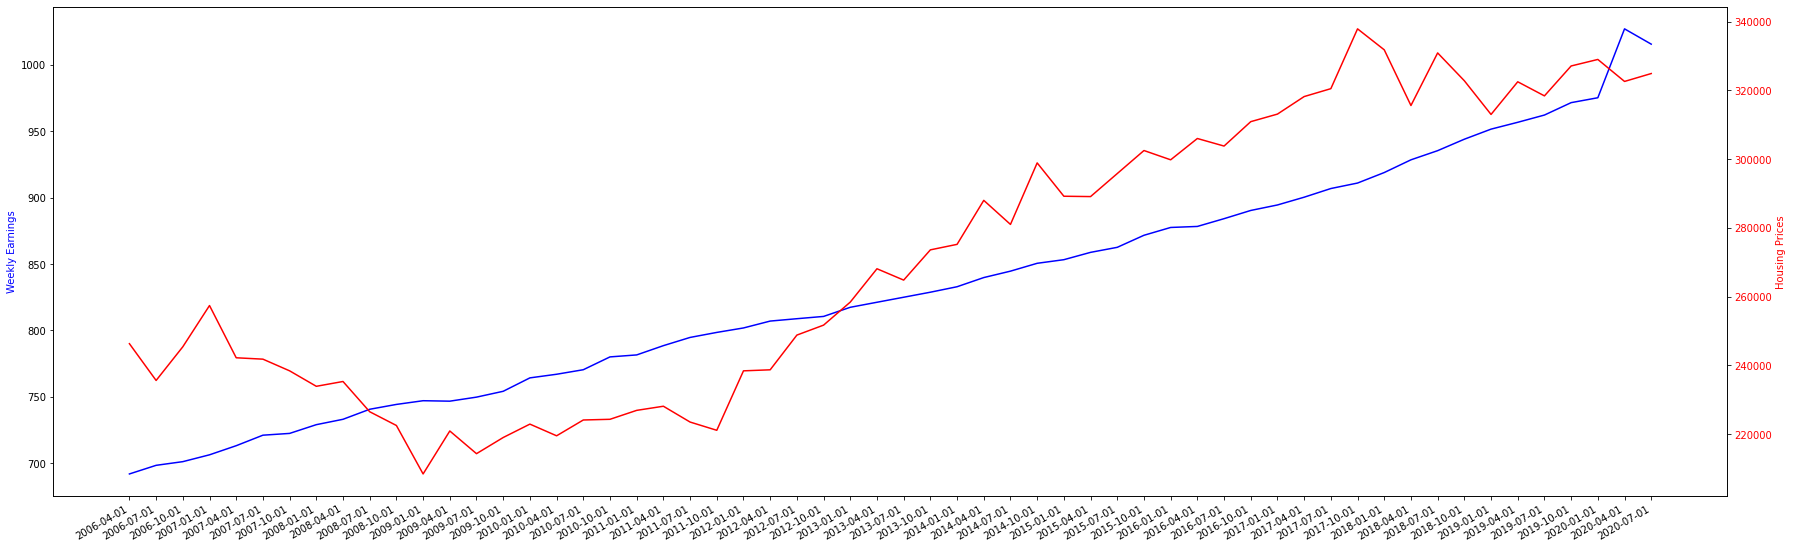

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

earnings = pd.read_csv("./data/weeklyearnings.csv")
housing = pd.read_csv("./data/housing.csv")

housing_list = []
earnings_list = []

for (index, earn) in earnings.iterrows():
    found_value = housing[housing["DATE"] == earn["DATE"]]
    if len(found_value) > 0:
        housing_list.append({"DATE": earn["DATE"], "MSPUS": found_value["MSPUS"]})
        earnings_list.append({"DATE": earn["DATE"], "CES0500000011": earn["CES0500000011"]})

housing_df = pd.DataFrame(housing_list)
earnings_df = pd.DataFrame(earnings_list)

fig = plt.figure(figsize=(30, 10))
ax1 = fig.add_subplot(111)
ax1.plot(earnings_df["DATE"], earnings_df["CES0500000011"], 'b-')
ax1.set_ylabel('Weekly Earnings', color="b")

ax2 = ax1.twinx()
ax2.plot(earnings_df["DATE"], housing_df["MSPUS"], 'r-')
ax2.set_ylabel('Housing Prices', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

fig.autofmt_xdate()

